# Naive Bayes classifier

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

## Loading data

In [2]:
with open('data\X.npy', 'rb') as f:
    X = np.load(f)
with open('data\y.npy', 'rb') as f:
    y = np.load(f)
    
print("\nWord counts vectors:\n",X,"\n\nTarget variables:\n",y)


Word counts vectors:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Target variables:
 [0 0 1 ... 1 0 1]


## Spliting data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1
)

print(
    "Train tweets number: {}\nTest tweets number: {}".format(
        X_train.shape[0], X_test.shape[0]
    )
)

Train tweets number: 5940
Test tweets number: 1049


## Training model

In [4]:
mNB = MultinomialNB()
mNB.fit(X_train, y_train)

for i in range(len(mNB.classes_)):
    print(
        "Class",
        mNB.classes_[i],
        "with",
        math.e ** mNB.class_log_prior_[i],
        "probability.",
    )

Class 0 with 0.4092592592592594 probability.
Class 1 with 0.5907407407407415 probability.


## Prediction

In [5]:
# predicting test set results
y_pred = mNB.predict(X_test)  # Dalsze plany: TfidfVectorizer()
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

## Validation

[Text(0, 0.5, 'real_news'), Text(0, 1.5, 'fake_news')]

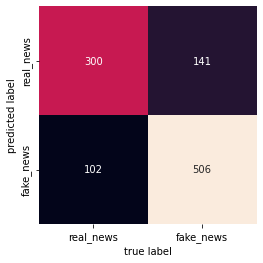

In [6]:
cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(cm, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
ax.xaxis.set_ticklabels(["real_news", "fake_news"])
ax.yaxis.set_ticklabels(["real_news", "fake_news"])

In [7]:
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       441
           1       0.78      0.83      0.81       608

    accuracy                           0.77      1049
   macro avg       0.76      0.76      0.76      1049
weighted avg       0.77      0.77      0.77      1049



## Saving model

In [8]:
# save the classifier
with open(r'data\Naive_Bayes_classifier.pkl', 'wb') as fid:
    pickle.dump(mNB, fid)  